In [25]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [3]:
df_path = r'../DATASETS/Social_Network_Ads.csv'

In [4]:
df = pl.read_csv(df_path)

In [5]:
df

Age,EstimatedSalary,Purchased
i64,i64,i64
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
…,…,…
46,41000,1
51,23000,1
50,20000,1


In [6]:
X = df.select(cs.exclude('Purchased'))

In [7]:
y = df.get_column('Purchased')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
decision_tree = DecisionTreeClassifier()

In [14]:
decision_tree.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [15]:
predictions = decision_tree.predict(scaled_X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [17]:
accuracy_score(y_test, predictions)

0.82

In [18]:
confusion_matrix(y_test, predictions)

array([[55,  8],
       [10, 27]])

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        63
           1       0.77      0.73      0.75        37

    accuracy                           0.82       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.82      0.82      0.82       100



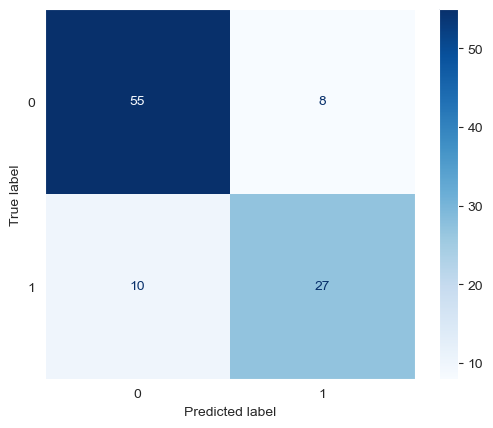

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

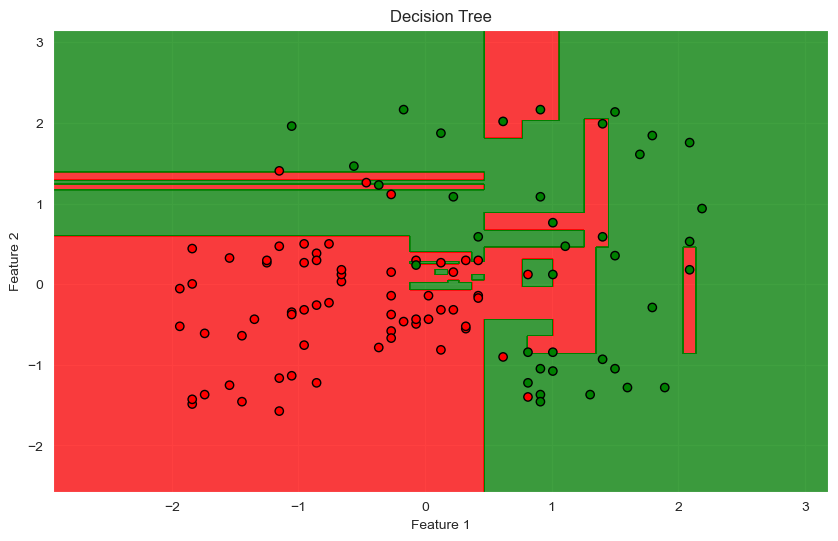

In [24]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaled_X_test[:, :2], y_test.to_numpy()
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, decision_tree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Decision Tree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()